# Entrainement du model YOLOV

In [ ]:
#pip install ultralytics opencv-python numpy torch torchvision torchaudio


   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/922.2 kB ? eta -:--:--
   --------------------- ---------------- 524.3/922.2 kB 182.3 

In [2]:
from ultralytics import YOLO
import os
import shutil
import random
import glob


In [ ]:


# Définition des chemins
base_path = "detection"
image_source = "Disease"
label_source = "Layout"

# Dossiers des classes
classes = ["Sana", "Fito", "Monilia"]

# Création des dossiers de destination
for folder in ["images/train", "images/val", "labels/train", "labels/val"]:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

# Récupération des fichiers et séparation en train/val (80%/20%)
train_ratio = 0.8

for class_name in classes:
    image_files = sorted(glob.glob(os.path.join(image_source, class_name, "*.jpg")))  # Modifier si autre format
    label_files = sorted(glob.glob(os.path.join(label_source, class_name, "*.txt")))

    paired_files = list(zip(image_files, label_files))
    random.shuffle(paired_files)

    train_size = int(len(paired_files) * train_ratio)
    
    for i, (img, label) in enumerate(paired_files):
        split = "train" if i < train_size else "val"
        shutil.copy(img, os.path.join(base_path, f"images/{split}", os.path.basename(img)))
        shutil.copy(label, os.path.join(base_path, f"labels/{split}", os.path.basename(label)))

# Création du fichier data.yaml
yaml_content = f"""train: {os.path.abspath(base_path)}/images/train
val: {os.path.abspath(base_path)}/images/val
nc: 3
names: ["Sana", "Fito", "Monilia"]
"""

with open(os.path.join(base_path, "data.yaml"), "w") as f:
    f.write(yaml_content)

print("✅ Organisation des fichiers terminée !")


✅ Organisation des fichiers terminée !


In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

model = YOLO("yolov8n.pt")  # Utilisation d'un modèle pré-entraîné
model.train(data="detection/data.yaml", epochs=50, imgsz=640, batch=8)


Ultralytics 8.3.85  Python-3.12.7 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13420H)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=detection/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning C:\Users\AMED BAH\Desktop\COURS M2\Deep Learning\CocoaDiseases\detection\labels\train.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]
val: Scanning C:\Users\AMED BAH\Desktop\COURS M2\Deep Learning\CocoaDiseases\detection\labels\val.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.484      2.825      1.273         28        640: 100%|██████████| 32/32 [01:12<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.58s/it]

                   all         63        336      0.276      0.568      0.254      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.394      1.951       1.22         17        640: 100%|██████████| 32/32 [01:10<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.12s/it]

                   all         63        336      0.375      0.336      0.273      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.379      1.837      1.165          7        640: 100%|██████████| 32/32 [01:11<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.17s/it]

                   all         63        336      0.367      0.449       0.34      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.402      1.822      1.194          5        640: 100%|██████████| 32/32 [01:11<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.15s/it]

                   all         63        336      0.432      0.364      0.319      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.423      1.823      1.215          3        640: 100%|██████████| 32/32 [01:11<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]

                   all         63        336      0.434      0.433      0.411      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.375      1.674      1.197          2        640: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.19s/it]

                   all         63        336      0.435      0.496      0.423      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.365      1.598      1.186          2        640: 100%|██████████| 32/32 [01:11<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all         63        336      0.567      0.452       0.46      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.344      1.502      1.152         15        640: 100%|██████████| 32/32 [01:11<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all         63        336      0.523      0.547      0.523      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.349      1.439      1.155          7        640: 100%|██████████| 32/32 [01:09<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]

                   all         63        336      0.561      0.601      0.547      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.305      1.479      1.133          7        640: 100%|██████████| 32/32 [01:10<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.40s/it]

                   all         63        336      0.453      0.585      0.442      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.337      1.375      1.147          9        640: 100%|██████████| 32/32 [01:09<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]

                   all         63        336      0.561      0.547      0.531      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.279      1.372      1.131          6        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]

                   all         63        336      0.595      0.617      0.627      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.293      1.329      1.126          5        640: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.15s/it]

                   all         63        336      0.468      0.533      0.449      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.247      1.267      1.115          6        640: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.592      0.543      0.585      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.257      1.225      1.097          9        640: 100%|██████████| 32/32 [01:08<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]

                   all         63        336      0.592      0.554      0.593      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.294      1.276      1.103         22        640: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.594      0.608      0.651      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.249      1.246      1.108          9        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.564      0.591      0.591      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.275      1.181        1.1          7        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]

                   all         63        336      0.645      0.609      0.609      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.197      1.159      1.085          7        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336       0.61      0.553        0.6      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.243      1.124      1.098         18        640: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]

                   all         63        336      0.642      0.588      0.643      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.225        1.1      1.092          7        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.663      0.588      0.673       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G        1.2        1.1      1.098          5        640: 100%|██████████| 32/32 [01:09<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.07s/it]

                   all         63        336      0.574      0.704      0.675       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.195      1.077      1.087          3        640: 100%|██████████| 32/32 [01:08<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.578      0.671      0.672      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.189       1.05      1.072          2        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.645       0.68      0.709      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.161      1.019      1.062          2        640: 100%|██████████| 32/32 [01:09<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]

                   all         63        336      0.771      0.603      0.709      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.192      1.043      1.079          5        640: 100%|██████████| 32/32 [01:07<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336      0.718      0.632      0.681      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.179     0.9955      1.082          6        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.729      0.683      0.719      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.152          1      1.056          6        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336       0.62      0.628      0.642      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.147     0.9643      1.057          7        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.778      0.628      0.717      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.132     0.9443      1.071          5        640: 100%|██████████| 32/32 [01:07<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.818       0.61      0.722      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.137      0.902      1.048         15        640: 100%|██████████| 32/32 [01:08<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.735      0.552       0.67      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.184     0.9121      1.068         17        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.01s/it]

                   all         63        336      0.661      0.666      0.687      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.144     0.9405      1.058          7        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.00s/it]

                   all         63        336      0.688      0.632      0.682      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G       1.12     0.9016      1.063          6        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.705      0.648      0.688       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.104       0.86      1.047          9        640: 100%|██████████| 32/32 [01:07<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.721      0.627      0.688      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.091      0.834      1.032          5        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.745      0.597      0.687      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.086     0.8336      1.033         12        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336      0.729      0.582      0.661      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.063     0.8268      1.026          8        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]

                   all         63        336      0.727      0.607      0.665      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.078     0.8017      1.035         14        640: 100%|██████████| 32/32 [01:07<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

                   all         63        336      0.711      0.623      0.701      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.095     0.8102       1.04          9        640: 100%|██████████| 32/32 [01:08<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.746      0.583      0.692       0.47


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.071     0.9076      1.008          1        640: 100%|██████████| 32/32 [01:07<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.00s/it]

                   all         63        336      0.728      0.611      0.659      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.051     0.8364      1.003         11        640: 100%|██████████| 32/32 [01:07<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]

                   all         63        336      0.689      0.598      0.673      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.032     0.7763      1.009          2        640: 100%|██████████| 32/32 [01:07<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336      0.757      0.584      0.696      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       1.01     0.7572     0.9985          6        640: 100%|██████████| 32/32 [01:06<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all         63        336      0.551      0.728      0.669      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.005     0.7526      1.001          5        640: 100%|██████████| 32/32 [01:07<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336      0.799      0.572      0.692      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9884     0.7253     0.9926          6        640: 100%|██████████| 32/32 [01:07<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63        336      0.718      0.612      0.702      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9771     0.7187     0.9759          2        640: 100%|██████████| 32/32 [01:06<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]

                   all         63        336      0.732      0.629      0.701      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9585     0.7302     0.9707          2        640: 100%|██████████| 32/32 [01:07<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.03s/it]

                   all         63        336      0.704      0.647      0.694      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9685     0.6829      0.979          4        640: 100%|██████████| 32/32 [01:07<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all         63        336       0.73      0.622      0.706      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9643     0.6808     0.9746         11        640: 100%|██████████| 32/32 [01:07<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.03s/it]

                   all         63        336      0.722      0.634      0.707      0.486



50 epochs completed in 1.075 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.85  Python-3.12.7 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13420H)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


                   all         63        336      0.818       0.61      0.722      0.493
                  Sana         33         45      0.753      0.578      0.639      0.463
                  Fito         22         26      0.917      0.577      0.773      0.575
               Monilia         54        265      0.785      0.675      0.753      0.441
Speed: 0.9ms preprocess, 43.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A7570A3EF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [5]:
import shutil
shutil.copy("runs/detect/train4/weights/best.pt", "detection/model_cacao.pt")


'detection/model_cacao.pt'

# Detection avec le model entrainé


In [4]:
from ultralytics import YOLO
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# Charger le modèle entraîné
model0 = YOLO("detection/model_cacao.pt")

# Charger l'image sur laquelle tu veux détecter les fèves
image_path = "detection/test_image.jpg"
results = model0(image_path)  # Détection sur l'image



image 1/1 c:\Users\AMED BAH\Desktop\COURS M2\Deep Learning\CocoaDiseases\detection\test_image.jpg: 640x448 13 Monilias, 118.3ms
Speed: 3.8ms preprocess, 118.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


In [22]:
import cv2

# Charger l'image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
    exit()

# Dessiner les boîtes de détection
for result in results:
    boxes = result.boxes.xyxy  # Coordonnées des bounding boxes [x1, y1, x2, y2]
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)  # Conversion en entier
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Dessiner la boîte verte

# Afficher l'image avec OpenCV
cv2.imshow("Détection des fèves", image)
cv2.waitKey(0)  # Attendre une touche pour fermer la fenêtre
cv2.destroyAllWindows()  # Fermer toutes les fenêtres OpenCV


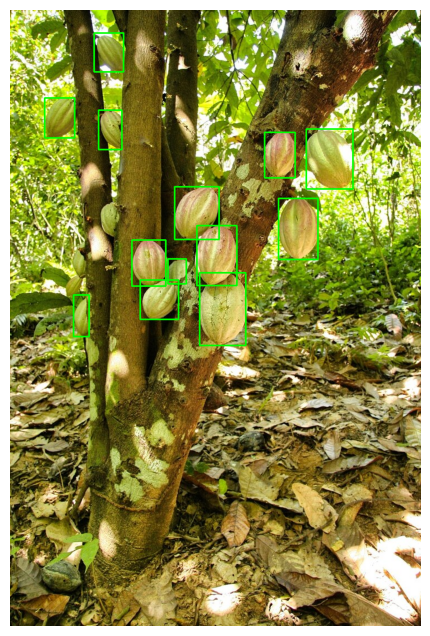

In [5]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
else:
    
    # Convertir l'image en RGB (OpenCV charge les images en BGR par défaut)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Dessiner les boîtes de détection
    for result in results:
        boxes = result.boxes.xyxy  # Coordonnées des bounding boxes [x1, y1, x2, y2]
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)  # Conversion en entier
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Dessiner la boîte verte
    
    # Afficher l'image dans le notebook avec Matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis("off")  # Supprimer les axes
    plt.show()
